In [1]:
%matplotlib notebook
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data file path
fp = r'/dls/science/groups/e02/Sample_data/sample_EELS_EDS_new/EDS Spectrum Image.dm4'
SI = hs.load(fp)

In [3]:
#correct for known offset
SI.axes_manager[-1].offset = -0.1

In [4]:
SI

<EDSTEMSpectrum, title: EDS Spectrum Image, dimensions: (94, 91|2048)>

In [5]:
#rebin data to improve signal to noise
SI = SI.rebin(scale = [4,4,1])

<IPython.core.display.Javascript object>


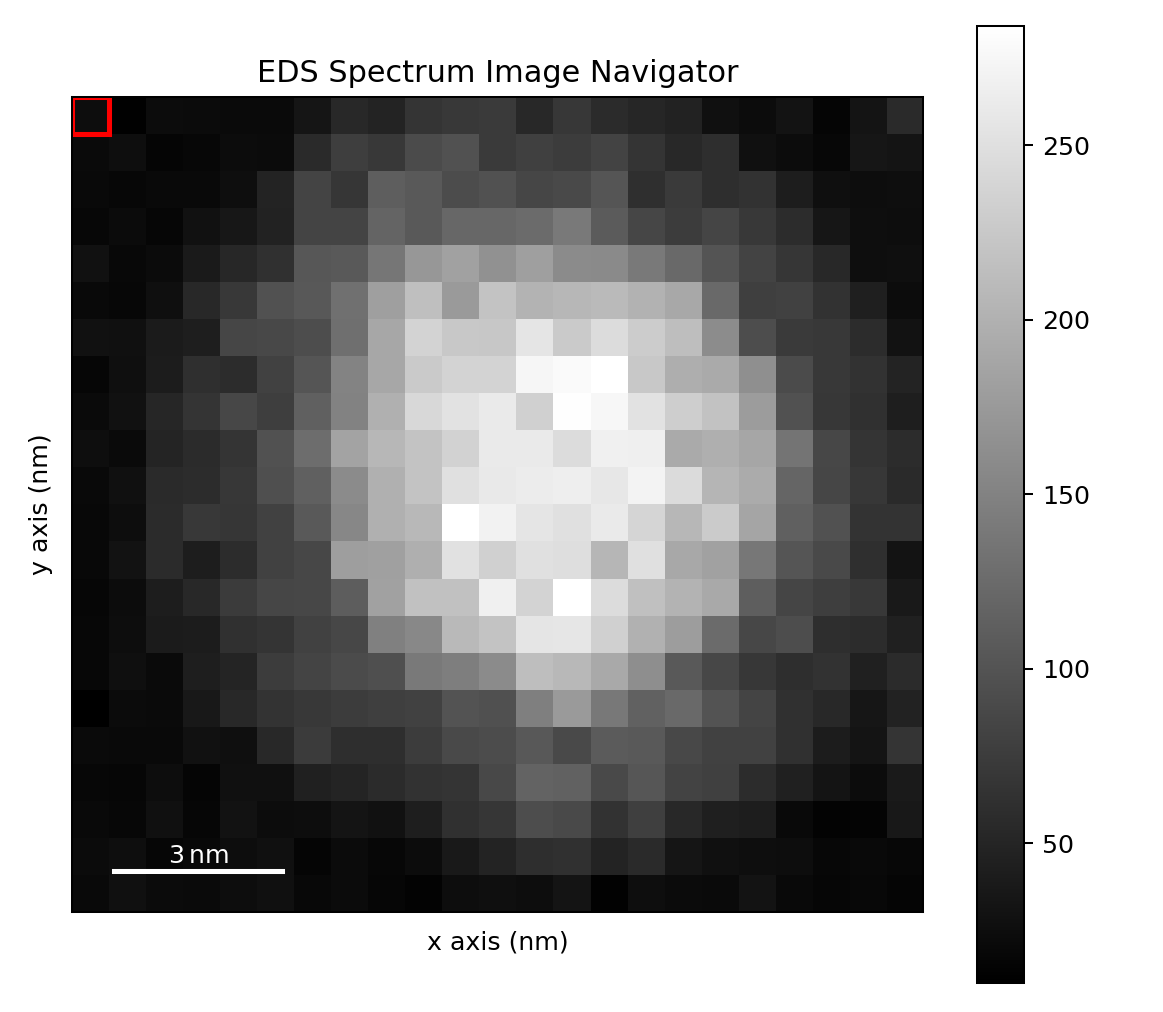

<IPython.core.display.Javascript object>


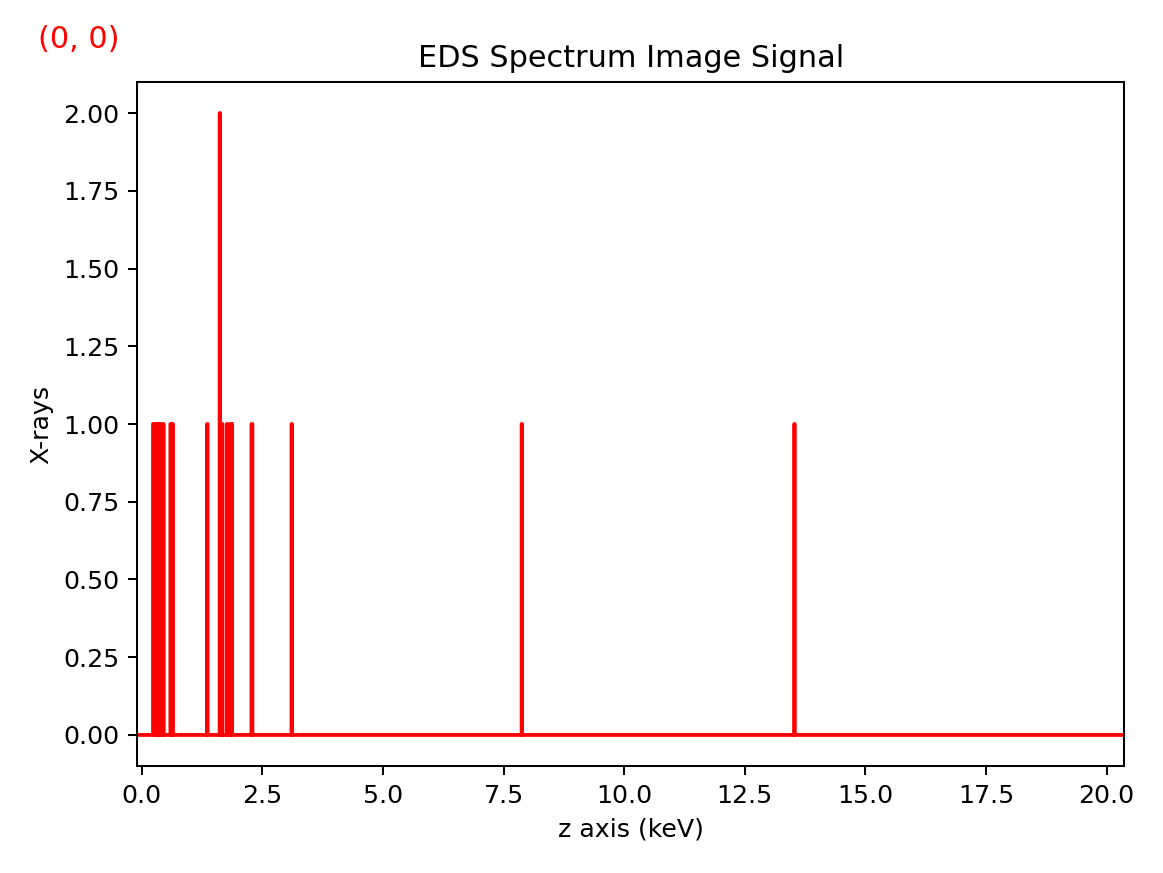

In [6]:
SI.plot()

<IPython.core.display.Javascript object>


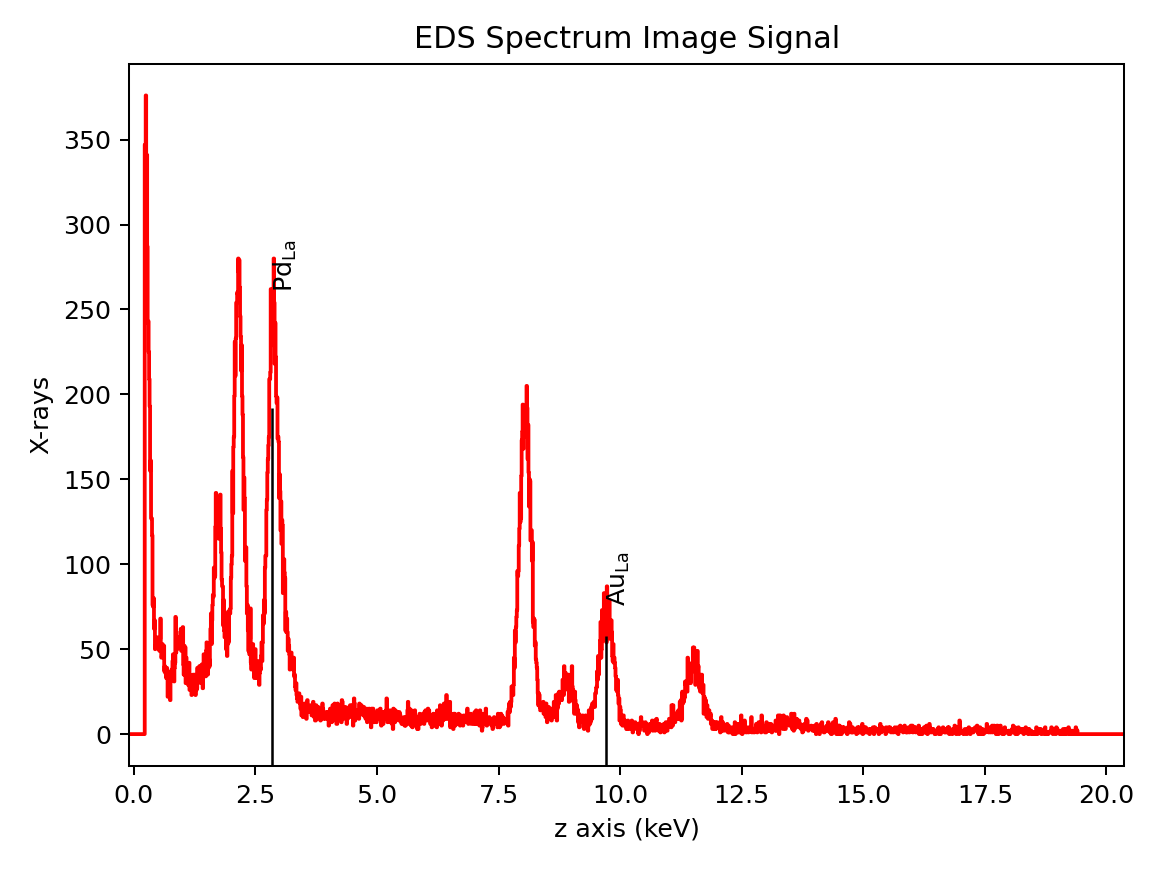

In [7]:
SI.add_elements(['Pd', 'Au'])
SI.add_lines()
SI_sum = SI.sum()
SI_sum.plot(True)

In [8]:
kfactors=([1,1]) # for Pd and Au
bw = SI.estimate_background_windows(line_width = [5.0,2.0])
intensities = SI.get_lines_intensity(background_windows=bw)
atomic_percent = SI.quantification(intensities, method = 'CL',
                                  factors = kfactors)

[########################################] | 100% Completed |  0.1s


/dls_sw/apps/python/miniforge/4.10.0-0/envs/epsic3.10/lib/python3.10/site-packages/hyperspy/misc/material.py:61: RuntimeWarning: invalid value encountered in true_divide
  atomic_percent[i] /= sum_weight


<IPython.core.display.Javascript object>


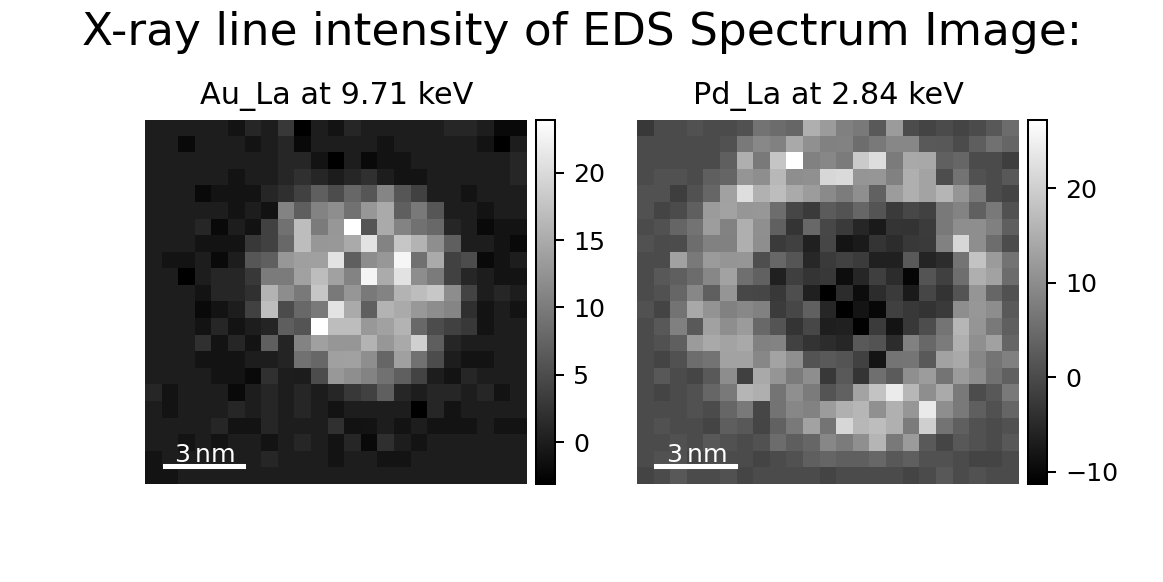

<IPython.core.display.Javascript object>


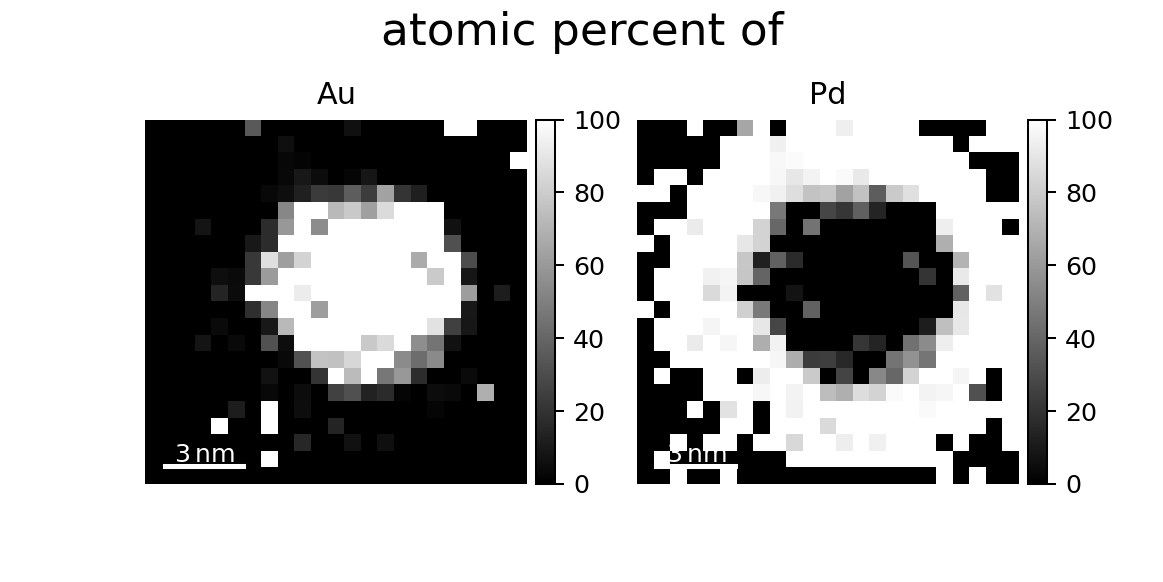

[<AxesSubplot:title={'center':'Au'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <AxesSubplot:title={'center':'Pd'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>]

In [9]:
#plot intensities 
hs.plot.plot_images(intensities, axes_decor='off', scalebar='all')
hs.plot.plot_images(atomic_percent, axes_decor='off', scalebar='all')
#intensities[1].plot()